# 📊 Vernier FSR Experiment

This notebook runs the `main.py` script to collect data from an Arduino-connected Vernier Force Plate and 3 FSR sensors.

It then automatically:
- Locates the latest clean CSV file (`vernier_clean_*.csv`)
- Loads the data
- Visualizes force and FSR readings over time

---
**Requirements**
- Arduino plugged in and running the compatible sketch
- Python packages: `pyserial`, `pandas`, `matplotlib`
- Ensure `main.py` is working and executable


In [48]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
plt.style.use("ggplot")

## ▶️ Run Data Collection

The following cell will:
- Start the logger using `main.py`
- Wait 2 seconds
- Record data for 10 seconds
- Save both raw and clean CSV files

In [50]:
clean_files = glob.glob("vernier_clean_*.csv")
latest_clean = max(clean_files, key=os.path.getctime) if clean_files else None

if latest_clean:
    print(f"📄 Using: {latest_clean}")
else:
    raise FileNotFoundError("No clean CSV file found. Did the script run correctly?")


📄 Using: vernier_clean_20250624_155954.csv


In [51]:
df = pd.read_csv(latest_clean)
df.head()

,Time(s),Force(N),DeltaF(N),FSR1,FSR2,FSR3
0,4.35,21.665,1.011,1023,1023,1022
1,4.56,20.654,-1.011,1023,1023,1023
2,4.67,21.665,1.011,1023,1023,1023
3,4.78,20.654,-1.011,1023,1023,1022
4,5.00,21.665,1.011,1023,1023,1023


## 📈 Visualize Sensor Data

This plot shows:
- Force (N) and Δ Force over time
- Raw FSR1, FSR2, FSR3 values

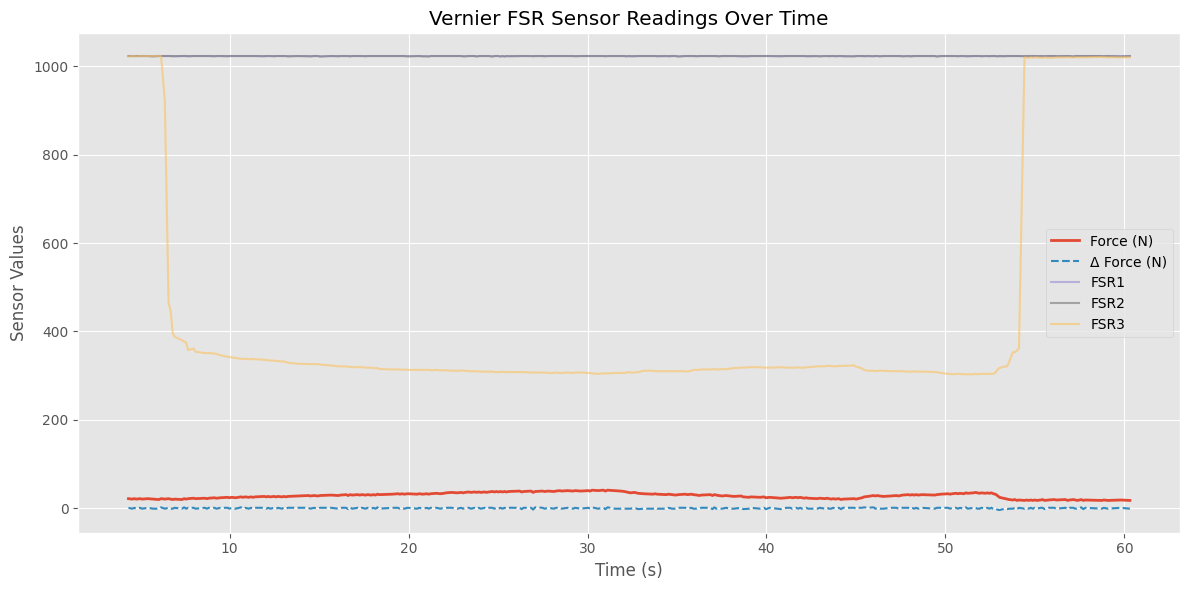

In [52]:
plt.figure(figsize=(12, 6))

plt.plot(df["Time(s)"], df["Force(N)"], label="Force (N)", linewidth=2)
plt.plot(df["Time(s)"], df["DeltaF(N)"], label="Δ Force (N)", linestyle="--")
plt.plot(df["Time(s)"], df["FSR1"], label="FSR1", alpha=0.6)
plt.plot(df["Time(s)"], df["FSR2"], label="FSR2", alpha=0.6)
plt.plot(df["Time(s)"], df["FSR3"], label="FSR3", alpha=0.6)

plt.xlabel("Time (s)")
plt.ylabel("Sensor Values")
plt.title("Vernier FSR Sensor Readings Over Time")
plt.legend()
plt.tight_layout()
plt.show()
